In [13]:
library(lmtest)
library(nlme)

# Часть 1

In [14]:
generate_regression <- function(x, a, b, lambda){
    
    y <- rep(1,length(x))
    sigma <- rep(1,length(x))
    
    for (i in 2:length(x)){
        sigma[i] <- lambda * sigma[i-1] +  rnorm(1, mean = 0, sd = 1)
    }
    
    for (i in 1:length(x)){
        y[i] <- a + b * x[i] + sigma[i]
    }

    return ( y )
}


# generate_regression_ar1 <- function(x, a, b, lambda) {
#   n <- length(x)
#   epsilon <- rep(0, n)
  
#   for (i in 2:n) {
#     epsilon[i] <- lambda * epsilon[i - 1] + rnorm(1, mean = 0, sd = 1)
#   }

#   y <- a + b * x + epsilon

#   return(list(y = y, epsilon = epsilon))
# }

## Генерация выборки с корреляцией

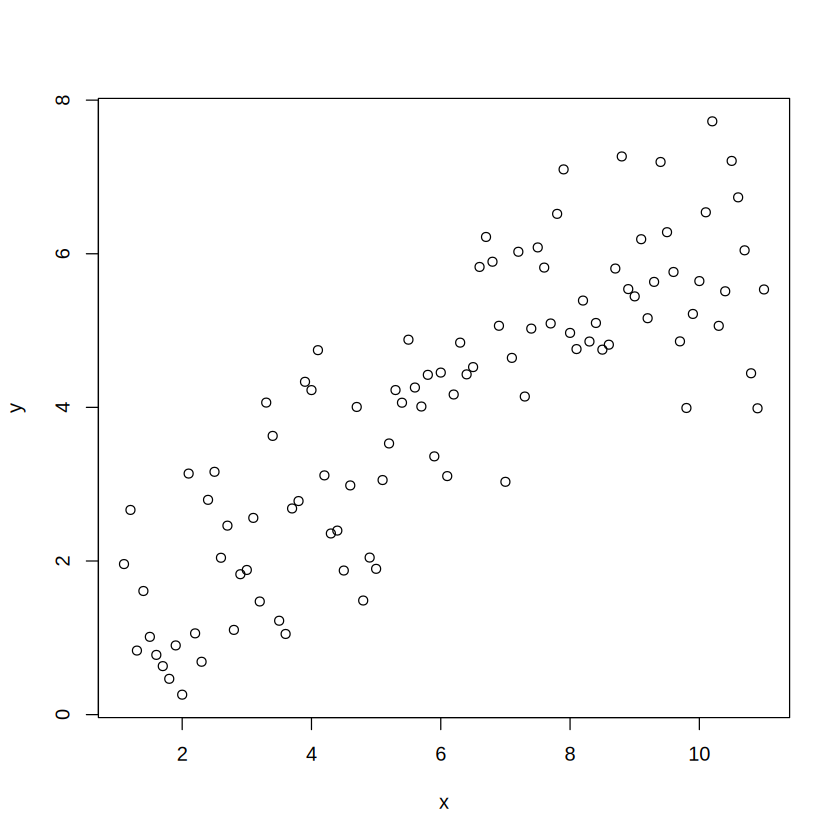

In [15]:
i <- 1:100
x <- 1 + 0.1 * i
y <- generate_regression(x, .3, .6, .2)
plot(x, y, type = "p") 

## тест Дарбина-Уотсона 

In [16]:
residuals <- lm(y~x)$residuals

n <- length(residuals)
sum_squared_diff <- sum(diff(residuals)^2)
sum_squared_residuals <- sum(residuals^2)
durbin_watson_statistic <- sum_squared_diff / sum_squared_residuals
durbin_watson_statistic

[1] 1.22794

Проверю значение библиотечным тестом

In [17]:
dwtest(lm(y~x))


	Durbin-Watson test

data:  lm(y ~ x)
DW = 1.2279, p-value = 3.118e-05
alternative hypothesis: true autocorrelation is greater than 0


## ДОМНК 

In [18]:
X <- cbind(1, x)
teta <- solve(t(X) %*% X) %*% t(X) %*% y
teta
# y_pred <- X %*% teta
# residuals <- y - y_pred

,0.7160071
x,0.5385815


In [19]:
gls(y ~ x, correlation = corAR1())

Generalized least squares fit by REML
  Model: y ~ x 
  Data: NULL 
  Log-restricted-likelihood: -138.4229

Coefficients:
(Intercept)           x 
  0.7563119   0.5314070 

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.4092175 
Degrees of freedom: 100 total; 98 residual
Residual standard error: 1.037582 

**Вроде все правильно, но оценки не верные**

# Часть 2

In [8]:
data <- read.table(file = "../Data/flats_1.txt", header = TRUE)
# data

In [9]:
model <- lm(Rent ~ M2, data = data)
gqtest(model)


	Goldfeld-Quandt test

data:  model
GQ = 7.0517, df1 = 23, df2 = 23, p-value = 7.421e-06
alternative hypothesis: variance increases from segment 1 to 2


In [10]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 2.504, p-value = 0.9599
alternative hypothesis: true autocorrelation is greater than 0


Присутствует **гетероскедастичность**